In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/refs/heads/main/Churn_Modelling.csv")

In [4]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3413,3414,15627412,Ferri,605,France,Male,39,3,0.00,2,1,0,199390.45,0
6767,6768,15654964,Piccio,608,Spain,Male,48,7,75801.74,1,1,0,125762.95,0
7300,7301,15788224,Sanderson,669,Germany,Male,45,1,123949.75,1,0,0,110881.56,0
4370,4371,15740470,Vinogradov,725,France,Male,39,4,160652.45,2,1,0,57643.55,0
9036,9037,15603378,Padovano,768,France,Female,36,3,141334.95,1,0,1,125870.50,0
534,535,15567832,Shih,550,France,Female,40,7,114354.95,1,1,0,54018.93,0
4191,4192,15715597,Onyemauchechi,679,France,Male,36,1,97234.58,1,1,0,188997.08,0
6395,6396,15707918,Bentley,741,Germany,Female,36,0,127675.39,2,1,0,74260.16,0
8413,8414,15597309,Howell,749,Spain,Male,36,7,0.00,2,0,0,80134.65,0
2683,2684,15739046,Maggard,850,Spain,Female,23,9,143054.85,1,0,1,62980.96,0


In [5]:
df.shape

(10000, 14)

<Axes: xlabel='Exited', ylabel='count'>

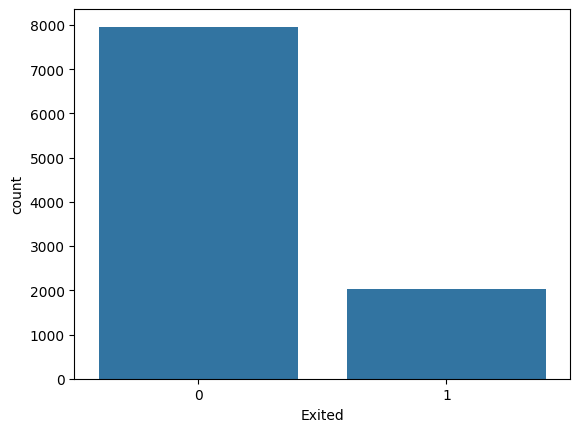

In [6]:
### Balanced?
sns.countplot(x="Exited",data=df)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df=df.drop(["RowNumber","CustomerId","Surname"],axis=1)

In [9]:
df.shape

(10000, 11)

array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>],
       [<Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>]], dtype=object)

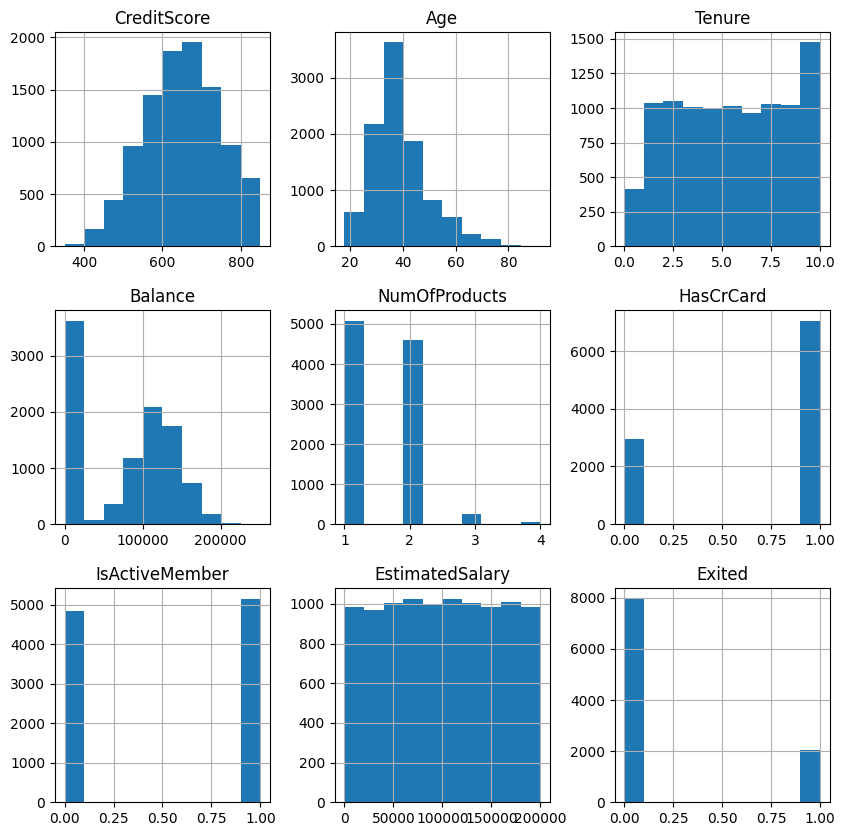

In [10]:
df.hist(figsize=(10,10))

<Axes: >

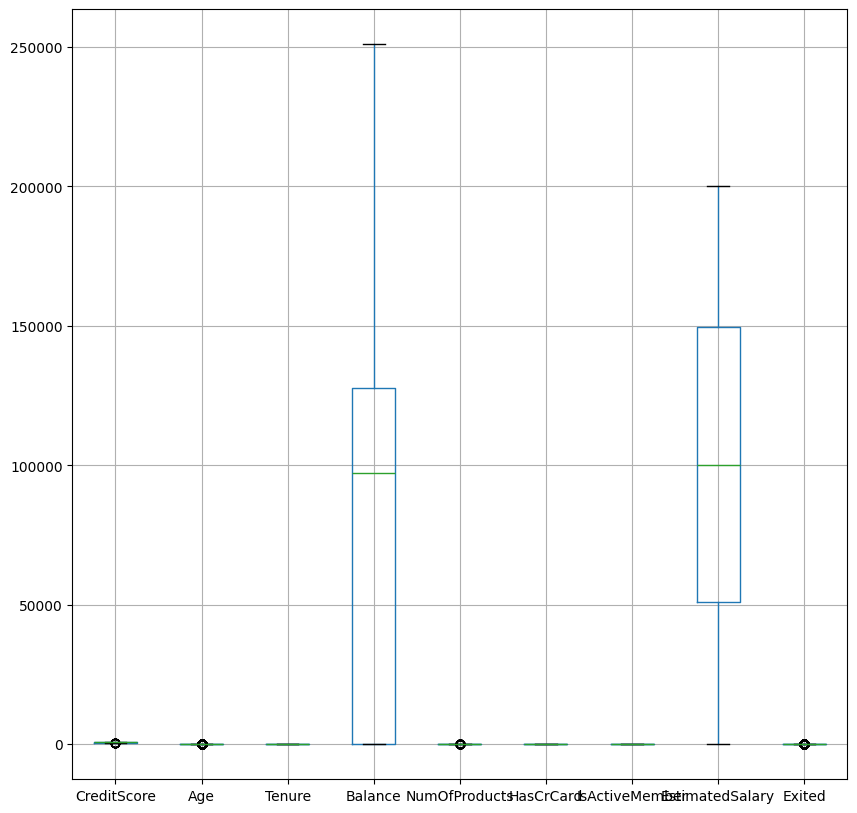

In [11]:
df.boxplot(figsize=(10,10))

In [12]:
df.sample()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4522,629,Spain,Male,39,5,0.0,2,0,0,116748.14,0


In [13]:

from sklearn.preprocessing import LabelEncoder

# Select categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Apply label encoding
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

display(df.head())

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #classification
Y=df[["Exited"]]
X=df.drop(["Exited"],axis=1)

In [15]:

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

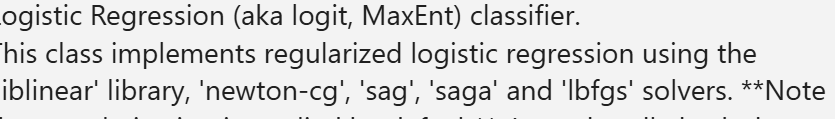

In [16]:
model_lr=LogisticRegression(solver="newton-cg")

model_lr.fit(X_train,Y_train)

LogisticRegression(solver='newton-cg')

In [17]:
model_lr.score(X_train,Y_train)

0.808

In [18]:

model_lr.score(X_test,Y_test)

0.8063333333333333

In [19]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier(n_neighbors=15)
model_knn.fit(X_train,Y_train)
print(model_knn.score(X_train,Y_train))
print(model_knn.score(X_test,Y_test))

0.8007142857142857
0.7826666666666666


In [21]:
from sklearn.svm import SVC
model_svc=SVC() #kernel,C
model_svc.fit(X_train,Y_train)
print(model_svc.score(X_train,Y_train))
print(model_svc.score(X_test,Y_test))

0.7988571428571428
0.7903333333333333


In [27]:
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier(max_depth=5)
model_dt.fit(X_train,Y_train)
print(model_dt.score(X_train,Y_train))
print(model_dt.score(X_test,Y_test))

0.8595714285714285
0.8553333333333333


In [31]:
from sklearn.ensemble import BaggingClassifier
model_bag=BaggingClassifier(max_samples=0.056)
model_bag.fit(X_train,Y_train)
print(model_bag.score(X_train,Y_train))
print(model_bag.score(X_test,Y_test))

0.8555714285714285
0.851


In [35]:
from sklearn.ensemble import AdaBoostClassifier
model_abc=AdaBoostClassifier()
model_abc.fit(X_train,Y_train)
print(model_abc.score(X_train,Y_train))
print(model_abc.score(X_test,Y_test))

0.8511428571428571
0.8546666666666667


In [43]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbc=GradientBoostingClassifier(max_depth=5,learning_rate=0.025)
model_gbc.fit(X_train,Y_train)
print(model_gbc.score(X_train,Y_train))
print(model_gbc.score(X_test,Y_test))

0.8698571428571429
0.8653333333333333


In [53]:
from sklearn.ensemble import RandomForestClassifier
model_rfc=RandomForestClassifier(max_depth=5)
model_rfc.fit(X_train,Y_train)
print(model_rfc.score(X_train,Y_train))
print(model_rfc.score(X_test,Y_test))

0.8612857142857143
0.8553333333333333


In [ ]:
### TOP n-> RFC,GBC,Bag,ABC,DTC

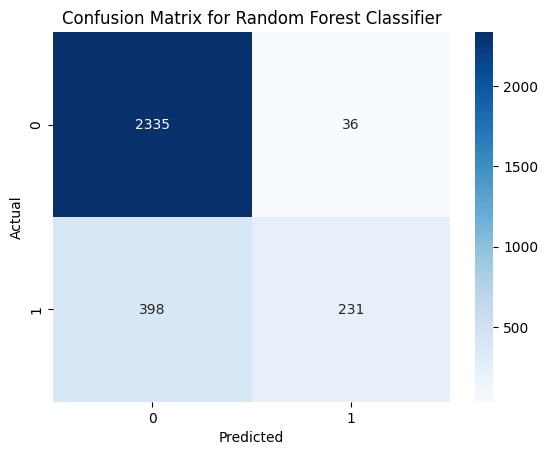

In [54]:
from sklearn.metrics import confusion_matrix
y_pred_rfc = model_rfc.predict(X_test)
cm_rfc = confusion_matrix(Y_test, y_pred_rfc)
sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [55]:
FN=398
FP=36

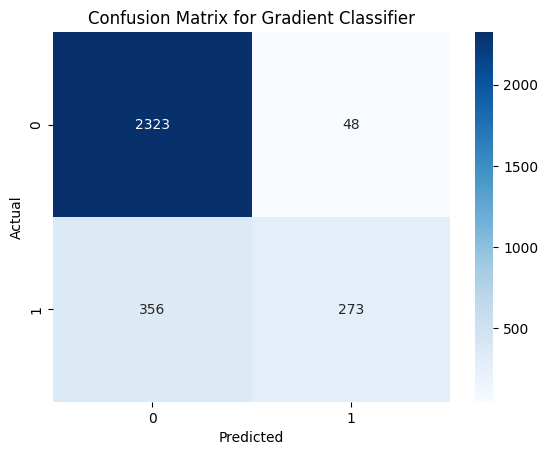

In [56]:
y_pred_gbc = model_gbc.predict(X_test)
cm_gbc = confusion_matrix(Y_test, y_pred_gbc)
sns.heatmap(cm_gbc, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gradient Classifier')
plt.show()

In [57]:
FN=356
FP=48

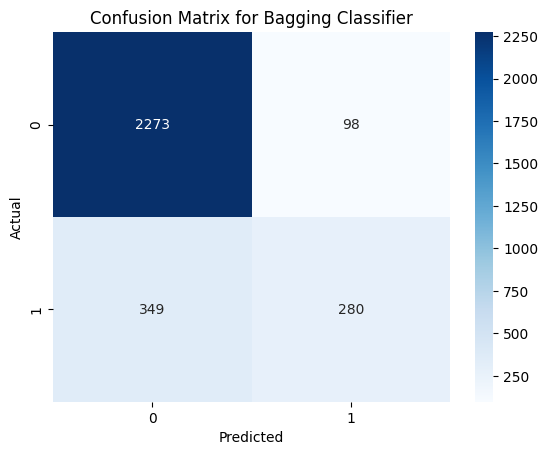

In [58]:
y_pred_bag = model_bag.predict(X_test)
cm_bag = confusion_matrix(Y_test, y_pred_bag)
sns.heatmap(cm_bag, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Bagging Classifier')
plt.show()

In [59]:
FN=349
FP=98

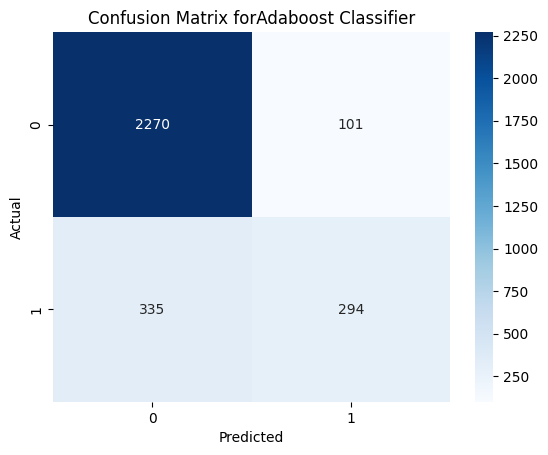

In [60]:
y_pred_abc = model_abc.predict(X_test)
cm_abc = confusion_matrix(Y_test, y_pred_abc)
sns.heatmap(cm_abc, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix forAdaboost Classifier')
plt.show()

In [61]:
FN=335
FP=101

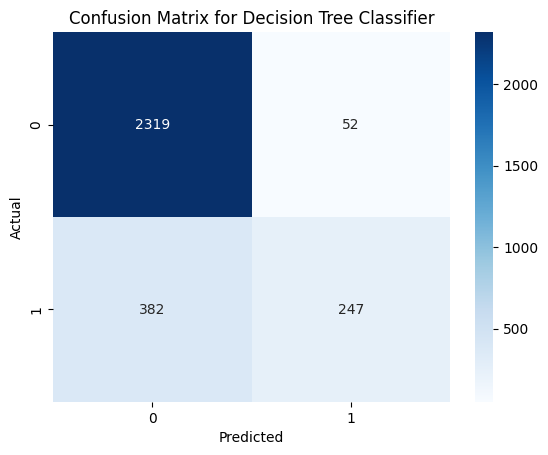

In [63]:
y_pred_dt = model_dt.predict(X_test)
cm_dt = confusion_matrix(Y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [64]:
FN=382
FP=52

In [ ]:
## For Example FN is risky.SO ABC is having less FN

In [ ]:
#Deploy model_abc with gradio

In [65]:
!pip install gradio -q

import gradio as gr

def predict_churn(CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary):
    # Create a DataFrame with the input features
    # Ensure the order of columns matches the training data
    input_data = pd.DataFrame([[CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary]],
                              columns=['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'])

    # Make prediction using the trained model
    prediction = model_abc.predict(input_data)

    # Return the prediction result
    if prediction[0] == 1:
        return "Churn"
    else:
        return "No Churn"

# Define the Gradio interface
inputs = [
    gr.Slider(minimum=350, maximum=850, label="CreditScore"),
    gr.Dropdown(choices=[0, 1, 2], label="Geography (0: France, 1: Germany, 2: Spain)"), # Assuming 0, 1, 2 represent the encoded values
    gr.Dropdown(choices=[0, 1], label="Gender (0: Female, 1: Male)"), # Assuming 0 and 1 represent the encoded values
    gr.Slider(minimum=18, maximum=92, label="Age"),
    gr.Slider(minimum=0, maximum=10, label="Tenure"),
    gr.Number(label="Balance"),
    gr.Slider(minimum=1, maximum=4, step=1, label="NumOfProducts"),
    gr.Dropdown(choices=[0, 1], label="HasCrCard (0: No, 1: Yes)"),
    gr.Dropdown(choices=[0, 1], label="IsActiveMember (0: No, 1: Yes)"),
    gr.Number(label="EstimatedSalary")
]

outputs = gr.Textbox(label="Prediction")

gr.Interface(fn=predict_churn, inputs=inputs, outputs=outputs).launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://073ee50e4ad5354cbc.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
3,15619304,Onio,502,France,Female,42,8,159660.8,3,1,0,113931.57,1